# 1. Movement with constant velocity

State vector <b>x</b> is a position of sth travelling with a constant velocity <b>v</b>. <br\>
Measurement is the very same position <b>z</b>.

In [1]:
import  numpy as np

### Parameters

In [2]:
N = 10
dt = 1.
v = -10.

### True trajectory

In [3]:
x0 = 100.
xtrue = np.empty((N,))
xtrue[0] = x0
for i in range(1,N):
    xtrue[i] = xtrue[i-1] + v*dt
print(xtrue)

[ 100.   90.   80.   70.   60.   50.   40.   30.   20.   10.]


### Measured trajectory

In [4]:
xmeas = np.empty((N,))
print(xmeas)
sigma = 10
for i in range(0,N):
    xmeas[i] = np.random.normal(xtrue[i], sigma)
print(xmeas)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 116.91021474   98.80240215   80.28243334   65.8432804    52.14493022   53.10036749   66.3674856    25.75372873   19.89491115   11.21633809]


## Kalman

In [5]:
xkal = np.empty((N,))
xpredict = np.empty((N,))
p = np.empty((N,))
K = np.empty((N,))
# initial position
xpredict[0] = xkal[0] = xmeas[0]
# initial variance on prediction
p[0] = 20
# measurement error
r = sigma^2

for i in range(1,N):
    # prediction: recursive formula
    xpredict[i] = xkal[i-1] + v*dt
    p[i] = p[i-1]
    K[i] = p[i]/(p[i]+r)
    xkal[i] = xpredict[i] + K[i]*(xmeas[i] - xpredict[i])
    p[i] = (1-K[i]) * p[i]


### Plot results

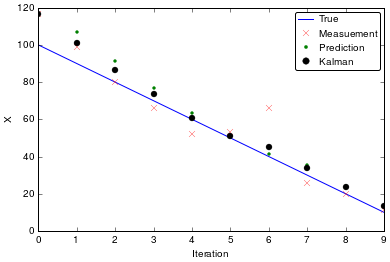

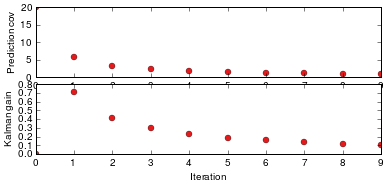

In [6]:
%matplotlib inline
import matplotlib.pyplot as plot
plot.plot(xtrue, 'b-', label = 'True')
plot.plot(xmeas, 'rx', label = 'Measuement')
plot.plot(xpredict, 'g.',  label = 'Prediction')
plot.plot(xkal, 'ko', label = 'Kalman')
plot.xlabel('Iteration')
plot.ylabel('X')
plot.legend()
plot.show()
plot.subplot(3,1,1)
plot.plot(p,'o')
plot.ylabel('Prediction cov')
plot.subplot(3,1,2)
plot.plot(K,'o')
plot.ylabel('Kalman gain')
plot.xlabel('Iteration')
plot.show()


# 2. Same problem but with unknown velocity

In [7]:
xpredict2 = np.matrix (np.linspace(0,10,N*2).reshape((2, N)))
xkal2 = np.matrix (np.linspace(0,10,N*2).reshape((2, N)))
# initial position
xpredict2[:,0] = xkal2[:,0] = np.array ( [[xmeas[0]], [np.random.normal(v,1.5) ] ])
# initial variance on prediction
p2 = np.matrix ( [[20, 0],
                    [0, 20]] )
# measurement error
r = np.matrix([[sigma^2]])

# prediction matrix
A = np.matrix ( [[1, dt],
                    [0, 1]] )
# transformation matrix (from measurement to state vector)
H = np.matrix ( [[1 , 0]] )

for i in range(1,N):
    # prediction: recursive formula
    xpredict2[:,i] = np.array ( [[ xkal2[0,i-1] + xkal2[1,i-1]*dt], [xkal2[1,i-1] ]] )
    p2 = A*p2*A.T
    K2 = p2*H.T/(H*p2*H.T+r)
    xkal2[:,i] = xpredict2[:,i] + K2*(xmeas[i] - H*xpredict2[:,i])
    p2 = (np.identity(2)-K2) * p2

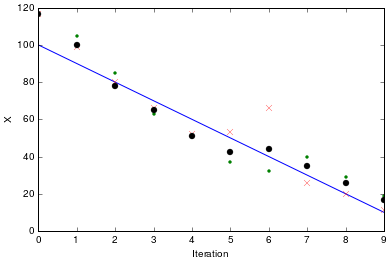

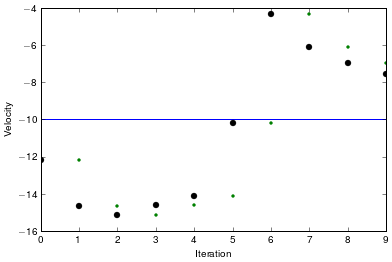

In [8]:
plot.plot(xtrue, 'b-', label = 'True')
plot.plot(xmeas, 'rx', label = 'Measuement')
plot.plot(xpredict2[0].T, 'g.',  label = 'Prediction')
plot.plot(xkal2[0].T, 'ko', label = 'Kalman')
plot.xlabel('Iteration')
plot.ylabel('X')
plot.show()

plot.axhline(v)
plot.plot(xpredict2[1].T, 'g.',  label = 'Prediction')
plot.plot(xkal2[1].T, 'ko', label = 'Kalman')
plot.xlabel('Iteration')
plot.ylabel('Velocity')
plot.show()

# 3. Same problem but with unknown velocity that is also measured

#### In principle should be better than 2. - why isn't ?? Additional measurement (on x_velocity) should improve kalman

OK, so we should still need a prediction on v

In [9]:
xmeas3 = np.matrix (np.linspace(0,10,N*2).reshape((2, N)))
sigma3 = 1
for i in range(0,N):
    xmeas3[0,i] = np.random.normal(xtrue[i], sigma)
    xmeas3[1,i] = np.random.normal(v, sigma3)
print(xmeas3.T)

[[  82.74816592   -9.92108382]
 [  83.90681406   -9.21461776]
 [ 101.5948464    -9.89123003]
 [  76.94676967  -10.47482323]
 [  63.09491567   -9.0937878 ]
 [  44.32815407  -10.09768774]
 [  37.08906734  -11.00341299]
 [  44.3324362   -10.51442872]
 [  10.33324708   -8.48205678]
 [  12.67841917  -11.90394876]]


In [10]:
xpredict3 = np.matrix (np.linspace(0,10,N*2).reshape((2, N)))
xkal3 = np.matrix (np.linspace(0,10,N*2).reshape((2, N)))
# initial position
xpredict3[:,0] = xkal3[:,0] = np.array ( [[xmeas3[0,0]], [xmeas3[1,0]] ] )
# initial variance on prediction
p2 = np.matrix ( [[20, 0],
                    [0, 20]] )
# measurement error
r3 = np.matrix([[0.001*sigma*sigma, 0],
                 [0  , 0.001*sigma3*sigma3]])

# prediction matrix
A = np.matrix ( [[1, dt],
                    [0, 1]] )
# transformation matrix (from measurement to state vector)
H3 = np.matrix ( [[1 , 0],
                   [0, 1]] )

for i in range(1,N):
    # prediction: recursive formula
    xpredict3[:,i] = np.array ( [[ xkal3[0,i-1] + xkal3[1,i-1]*dt], [xkal3[1,i-1] ]] )
    print(xpredict3[:,i].T)
    p2 = A*p2*A.T
    K2 = p2*H3.T * np.linalg.inv(H3*p2*H3.T+r3)
    xkal3[:,i] = xpredict3[:,i] + K2*(xmeas3[:,i] - H3*xpredict3[:,i])
    p2 = (np.identity(2)-K2) * p2

[[ 72.8270821   -9.92108382]]
[[ 74.64107112  -9.21413705]]
[[ 78.46426199  -9.48409818]]
[[ 67.80792901  -9.81716683]]
[[ 57.21724709  -9.65606105]]
[[ 44.57392778  -9.79326229]]
[[ 32.74155311 -10.01955225]]
[[ 24.29594143 -10.03971735]]
[[ 13.08335261  -9.91282435]]


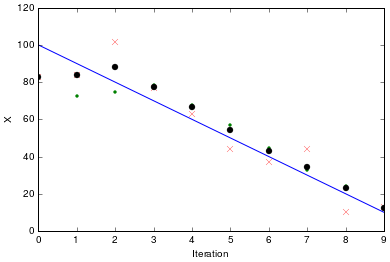

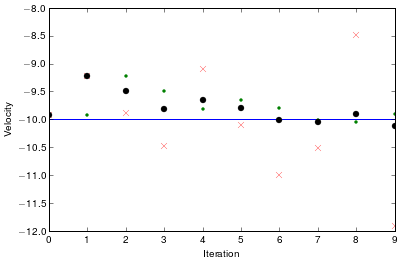

In [11]:
plot.plot(xtrue, 'b-', label = 'True')
plot.plot(xmeas3[0].T, 'rx', label = 'Measuement')
plot.plot(xpredict3[0].T, 'g.',  label = 'Prediction')
plot.plot(xkal3[0].T, 'ko', label = 'Kalman')
plot.xlabel('Iteration')
plot.ylabel('X')
plot.show()

plot.axhline(v)
plot.plot(xpredict3[1].T, 'g.',  label = 'Prediction')
plot.plot(xmeas3[1].T, 'rx', label = 'Measuement')
plot.plot(xkal3[1].T, 'ko', label = 'Kalman')
plot.xlabel('Iteration')
plot.ylabel('Velocity')
plot.show()